In [1]:
# Install YOLOv11 and dependencies
!pip install ultralytics
!pip install wandb  # For logging
!pip install python-dotenv  # For environment variables if needed


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!nvidia-smi


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


📊 Dataset Statistics
---------------------
Total Images: 4000
Train Images: 2816
Val Images: 810
Test Images: 374

🎯 Class Distribution
crack: 898 labels
broken lamp: 704 labels
dent: 2543 labels
scratch: 3595 labels
shatter glass: 681 labels
flat tire: 319 labels

⚖️ Label Density (labels per image)
Train: 2.21 labels/image
Val: 2.15 labels/image
Test: 2.10 labels/image


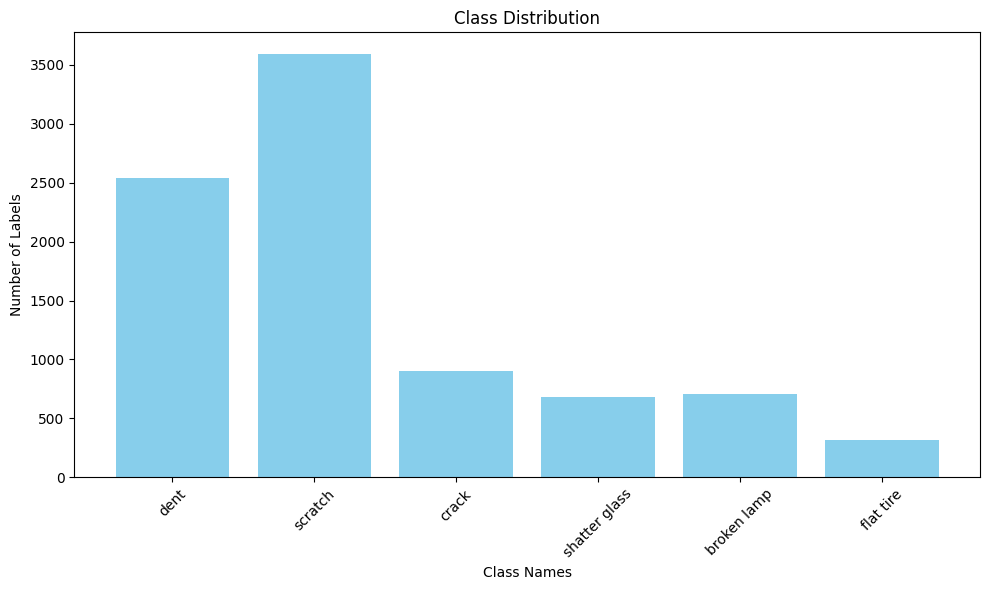

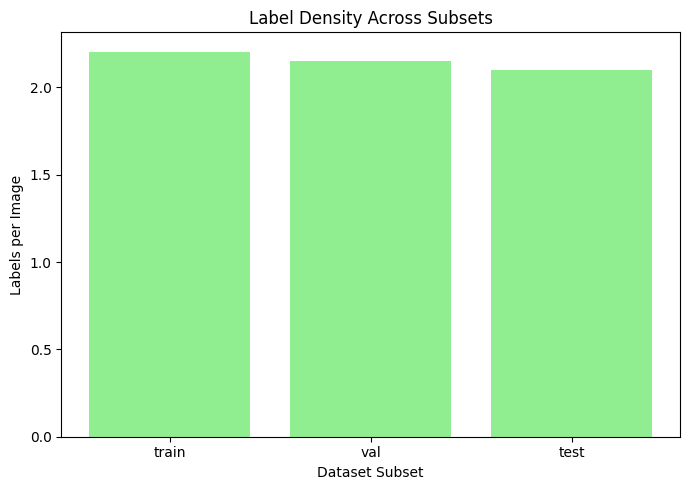

In [3]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def analyze_car_damage_dataset(dataset_path, class_names):
    """
    Analyze car damage dataset with statistics and visualizations.

    Args:
    - dataset_path: Path to the dataset directory (contains 'images' & 'labels').
    - class_names: List of class names.
    """
    subsets = ['train', 'val', 'test']
    class_counts = Counter()
    subset_image_counts = {}
    label_density = {}

    # Analyze each subset
    for subset in subsets:
        label_folder = os.path.join(dataset_path, 'labels', subset)
        image_folder = os.path.join(dataset_path, 'images', subset)

        # Count images
        num_images = len(os.listdir(image_folder)) if os.path.exists(image_folder) else 0
        subset_image_counts[subset] = num_images

        # Count labels
        total_labels = 0
        if os.path.exists(label_folder):
            for label_file in os.listdir(label_folder):
                with open(os.path.join(label_folder, label_file), 'r') as f:
                    lines = f.readlines()
                    total_labels += len(lines)
                    for line in lines:
                        class_id = int(line.split()[0])
                        class_counts[class_id] += 1

        # Calculate label density
        label_density[subset] = total_labels / num_images if num_images > 0 else 0

    # Print statistics
    print("📊 Dataset Statistics")
    print("---------------------")
    print(f"Total Images: {sum(subset_image_counts.values())}")
    for subset, count in subset_image_counts.items():
        print(f"{subset.capitalize()} Images: {count}")

    print("\n🎯 Class Distribution")
    for class_id, count in class_counts.items():
        print(f"{class_names[class_id]}: {count} labels")

    print("\n⚖️ Label Density (labels per image)")
    for subset, density in label_density.items():
        print(f"{subset.capitalize()}: {density:.2f} labels/image")

    # Plot class distribution
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, [class_counts.get(i, 0) for i in range(len(class_names))], color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Class Names')
    plt.ylabel('Number of Labels')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot label density per subset
    plt.figure(figsize=(7, 5))
    plt.bar(subset_image_counts.keys(), label_density.values(), color='lightgreen')
    plt.title('Label Density Across Subsets')
    plt.xlabel('Dataset Subset')
    plt.ylabel('Labels per Image')
    plt.tight_layout()
    plt.show()


# Define class names
class_names = ["dent", "scratch", "crack", "shatter glass", "broken lamp", "flat tire"]

# Run the analysis
dataset_path = "/content/drive/MyDrive/CARS DATA/Abdulrahman/car_damage_dataset"
analyze_car_damage_dataset(dataset_path, class_names)


In [4]:
# Install W&B
!pip install wandb


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: osamaandwajeeh (osamaandwajeeh-na) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [9]:
import wandb

wandb.login()
# Initialize W&B with project & entity
wandb.init(project="car_damage_segmentation", settings=wandb.Settings(init_timeout=180))


In [10]:
project_path = "/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train"
dataset_yaml_path = "/content/drive/MyDrive/CARS DATA/Abdulrahman/car_damage_dataset/car_damage_dataset.yaml"

wandb.init(project="car_damage_segmentation")


from ultralytics import YOLO
# Initialize model (YOLOv11 segmentation model)
model = YOLO('/content/drive/MyDrive/CARS DATA/Abdulrahman/yolo11l-seg.pt')  # Ensure model file is accessible

# Train the model
model.train(data=dataset_yaml_path,
            epochs=100,
            batch=16,
            imgsz=640,
            device=0,
            project=project_path,
            name='car_damage_segmentation',
            save_period=2,  # Save checkpoint every 2 epoch
            cos_lr=True,
            optimizer='AdamW'
)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/CARS DATA/Abdulrahman/yolo11l-seg.pt, data=/content/drive/MyDrive/CARS DATA/Abdulrahman/car_damage_dataset/car_damage_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=2, cache=False, device=0, workers=8, project=/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train, name=car_damage_segmentation, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False,

train: Scanning /content/drive/MyDrive/CARS DATA/Abdulrahman/car_damage_dataset/labels/train.cache... 2816 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2816/2816 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/CARS DATA/Abdulrahman/car_damage_dataset/labels/val.cache... 810 images, 0 backgrounds, 0 corrupt: 100%|██████████| 810/810 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 176 weight(decay=0.0), 187 weight(decay=0.0005), 186 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.1G      2.219      4.291      3.554      2.319         60        640: 100%|██████████| 176/176 [01:46<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.55it/s]


                   all        810       1744      0.336     0.0814    0.00532    0.00112      0.505    0.00269     0.0012   0.000202

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.1G      2.139       4.13      3.307      2.208         77        640: 100%|██████████| 176/176 [01:41<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]


                   all        810       1744      0.215      0.211     0.0473     0.0219      0.211      0.163     0.0398     0.0138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.6G      2.015      3.982       3.12      2.131         66        640: 100%|██████████| 176/176 [01:40<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]


                   all        810       1744      0.419       0.18     0.0688     0.0382      0.563      0.101     0.0623     0.0276

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.1G      1.955      3.897      3.019      2.076         73        640: 100%|██████████| 176/176 [01:40<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744      0.471      0.205      0.115     0.0457      0.832      0.103     0.0851     0.0276

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.5G      1.889      3.768      2.892       2.01         58        640: 100%|██████████| 176/176 [01:40<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]


                   all        810       1744      0.469      0.206      0.132     0.0714      0.494      0.143       0.11     0.0425

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.2G      1.834       3.68       2.79      1.963         92        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]


                   all        810       1744      0.899      0.206      0.279      0.179      0.936      0.181       0.27      0.133

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.6G      1.785      3.608      2.719       1.92         72        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]


                   all        810       1744      0.905      0.216      0.284      0.179      0.904      0.211      0.263      0.133

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.6G      1.736      3.506      2.656      1.891         71        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744       0.79      0.221      0.276      0.193      0.787      0.218      0.269      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.2G       1.71      3.461      2.591      1.855         75        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]


                   all        810       1744      0.618      0.237      0.298      0.189      0.636      0.232      0.281      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.2G      1.678        3.4       2.53      1.825         95        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]


                   all        810       1744      0.801      0.224      0.294      0.201      0.801      0.225      0.291      0.165

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.6G      1.673      3.367      2.473      1.818         76        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]


                   all        810       1744      0.175      0.293      0.243      0.165       0.18      0.297      0.245      0.137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.6G      1.635      3.314      2.395      1.779         51        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]


                   all        810       1744      0.691      0.356      0.387      0.269      0.703      0.352       0.38      0.238

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.6G      1.601      3.251      2.335      1.753         53        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.613      0.354      0.365      0.255      0.639      0.336       0.35      0.209

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.6G       1.58      3.205      2.297      1.739         86        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.493      0.414      0.389      0.286      0.507      0.404      0.379      0.229

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.5G      1.572       3.14      2.254      1.734         70        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.766      0.358      0.409      0.289      0.577      0.372      0.401      0.259

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.6G      1.552      3.135      2.217      1.717         84        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.392      0.437      0.432      0.307      0.484      0.439      0.429      0.275

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.6G      1.533      3.082      2.172      1.683         75        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]


                   all        810       1744      0.583      0.378      0.368      0.264      0.592      0.373      0.358      0.228

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.2G       1.52      3.077      2.142      1.689        103        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.593      0.378      0.367      0.266      0.583      0.369      0.356      0.229

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.5G      1.483       3.01      2.093      1.664         64        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744       0.64      0.368      0.423      0.308      0.606      0.386      0.418      0.279

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.6G      1.489      2.983      2.106      1.663        100        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.414      0.392      0.417      0.313      0.424      0.392      0.411      0.269

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.2G       1.47      2.988      2.083       1.65         76        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]


                   all        810       1744      0.402      0.425      0.439      0.336      0.418      0.411       0.43      0.293

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.1G      1.474      2.941      2.018      1.649         82        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.644       0.47      0.463      0.342       0.63      0.455      0.448      0.301

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.2G      1.443       2.88      2.001      1.631         96        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]


                   all        810       1744      0.568      0.477      0.443      0.326      0.574      0.462      0.434      0.295

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.2G      1.409      2.865      1.947      1.609         71        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.36it/s]


                   all        810       1744      0.629       0.47      0.474      0.364      0.623      0.469      0.469      0.324

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.1G      1.395      2.836      1.905      1.596         77        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]


                   all        810       1744      0.604      0.485      0.474      0.361      0.592      0.478      0.466      0.322

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.1G      1.414      2.817      1.927      1.596         81        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.488      0.496       0.49      0.365      0.491      0.493      0.479      0.326

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.1G      1.384      2.806      1.907      1.581         63        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744      0.482      0.453      0.478      0.358      0.505      0.464      0.468      0.329

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.5G      1.379      2.785      1.889      1.574         71        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.741      0.369      0.416      0.313      0.735      0.369      0.412      0.277

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.2G      1.381      2.789      1.871      1.574         60        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.612      0.519      0.525      0.399      0.614      0.503      0.517      0.352

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.6G      1.378      2.765      1.873      1.565         69        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.583      0.456      0.501      0.385      0.585      0.455      0.497       0.35

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.5G      1.347      2.702      1.799      1.549         63        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.497      0.478      0.463       0.35      0.495      0.474      0.458      0.329

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.6G      1.346      2.698      1.828      1.552         78        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744       0.62      0.504      0.526      0.403      0.618      0.492       0.52      0.368

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.1G      1.356      2.726      1.808      1.546         81        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]


                   all        810       1744      0.563      0.547      0.536      0.411      0.546      0.542      0.526       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.1G       1.33      2.665      1.765      1.522         90        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.533      0.506      0.526        0.4      0.506      0.507      0.514      0.359

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.6G      1.308      2.648      1.773      1.523         66        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.649      0.516      0.511      0.388      0.645      0.508      0.496      0.355

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      12.5G       1.31      2.603       1.72      1.516         77        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.602      0.526      0.537      0.407      0.595      0.521      0.522      0.367

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.2G      1.278      2.591      1.678      1.498         72        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]


                   all        810       1744      0.573      0.523      0.529      0.399      0.546      0.519      0.511       0.36

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.2G      1.302      2.595      1.713      1.504         91        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]


                   all        810       1744      0.523      0.552       0.54      0.416      0.539      0.532      0.523      0.375

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.6G      1.303      2.622      1.745      1.511         92        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.464       0.52      0.494      0.381      0.495      0.499      0.485      0.341

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.6G      1.275      2.582       1.68      1.493         75        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.563      0.564      0.548      0.424      0.568      0.557      0.536      0.375

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.1G      1.258      2.535      1.651      1.471         79        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.516      0.546      0.548       0.42      0.513      0.525      0.525      0.367

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.6G      1.252      2.502      1.635      1.478         59        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]


                   all        810       1744      0.536      0.521      0.543      0.421       0.53       0.52      0.527      0.356

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.6G      1.259      2.531      1.641       1.48         98        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        810       1744      0.541      0.571       0.56      0.435      0.529      0.555      0.537      0.372

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.6G      1.251      2.499      1.614      1.469         84        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.553       0.56      0.555      0.425      0.527      0.532      0.512      0.366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.1G      1.213      2.446      1.578      1.443         67        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.644      0.562      0.577      0.449      0.647      0.535      0.538      0.372

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.6G      1.203      2.427      1.532      1.441         63        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.609      0.572      0.582      0.455      0.561       0.54      0.518      0.361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.5G      1.216       2.44      1.558      1.446         67        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.742      0.562      0.587      0.463      0.685      0.527      0.526      0.381

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.6G       1.19      2.399      1.514      1.426         69        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744      0.659      0.533      0.569      0.445      0.515       0.49      0.499      0.367

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      12.2G      1.194      2.412      1.534       1.43         81        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.559      0.572      0.565      0.446      0.503       0.51      0.482      0.345

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.6G      1.201       2.39      1.517       1.43         76        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.537      0.592      0.584      0.459       0.54      0.493        0.5      0.361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.2G      1.168      2.351      1.486      1.409         73        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.648      0.564       0.59       0.46      0.559      0.492      0.496      0.339

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.1G      1.171      2.349      1.491      1.418         59        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744      0.596      0.591      0.606      0.474      0.611      0.486      0.499      0.358

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.2G      1.159      2.305      1.446      1.403         63        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.626      0.553      0.598      0.468      0.658      0.474       0.49      0.361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.1G      1.158      2.334      1.448      1.401         74        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.578      0.597      0.603       0.48      0.488      0.534      0.507      0.368

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.5G      1.142      2.283      1.433      1.394         90        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.562      0.598      0.602      0.486      0.617       0.47      0.492      0.357

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.5G      1.137       2.28        1.4      1.389         74        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.611        0.6      0.615      0.486      0.462      0.519      0.479      0.337

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.6G      1.137      2.274      1.386      1.384        104        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.588       0.63      0.628      0.491      0.585      0.489      0.504       0.35

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.5G      1.136       2.27      1.387      1.377         77        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744       0.61      0.608       0.61      0.479      0.529      0.475      0.466      0.325

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.1G       1.12      2.271      1.375      1.373         93        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.623      0.606      0.615      0.485      0.512      0.495      0.468      0.328

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.6G       1.11      2.229      1.364      1.366         82        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.569      0.625      0.613      0.488      0.553      0.486      0.492      0.361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.1G      1.089      2.208      1.332       1.35         71        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]


                   all        810       1744      0.587      0.596      0.607      0.484      0.543      0.492      0.491       0.34

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.2G      1.099      2.196      1.327      1.356         76        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744      0.604      0.615      0.629      0.498      0.504      0.463      0.448       0.32

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      12.6G      1.084      2.192      1.323      1.345         73        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744      0.607      0.622      0.619      0.497      0.494      0.498       0.47      0.334

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.1G      1.079      2.181      1.321      1.338         76        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.598      0.604      0.623        0.5      0.566      0.436      0.436      0.301

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.5G      1.068      2.158      1.276      1.332         76        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.625      0.618      0.633      0.507      0.488      0.481       0.45      0.315

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.6G      1.077      2.165      1.302      1.342         63        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.583      0.629      0.624      0.498      0.542       0.44      0.442      0.313

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.5G      1.063      2.153       1.28      1.328         73        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.642       0.62      0.629      0.499      0.491      0.457      0.433      0.297

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      12.1G      1.045      2.115      1.242      1.316         71        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.582      0.625      0.625      0.501      0.451      0.461      0.438      0.304

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.1G      1.065      2.125      1.254      1.328         77        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744       0.63      0.625      0.634      0.505      0.474      0.477      0.456      0.316

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.2G      1.049      2.111      1.241      1.314         65        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.632      0.622      0.637      0.507      0.484       0.48       0.46      0.326

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.1G      1.036      2.096      1.224      1.303         88        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744      0.632      0.613      0.635      0.508      0.496      0.464      0.447      0.325

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.6G      1.039      2.096      1.215      1.315         87        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.616      0.644      0.641       0.51      0.493      0.451      0.431      0.302

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      12.5G      1.024      2.058      1.191      1.298         57        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]


                   all        810       1744       0.63       0.64      0.648      0.515       0.53      0.471      0.461      0.331

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      12.6G      1.015      2.047      1.182      1.295         91        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744      0.648      0.646       0.65      0.518      0.502      0.464      0.444      0.311

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.1G      1.001      2.023      1.159      1.282         83        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.639      0.635      0.644      0.512      0.488      0.464      0.451      0.321

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.5G      1.014      2.037      1.174      1.288         79        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744       0.61      0.654      0.652      0.519      0.471      0.461      0.443      0.313

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.1G      1.007      2.025      1.154      1.282         72        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.625      0.628      0.645      0.511      0.524      0.483      0.467      0.338

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.5G     0.9898       2.01      1.151      1.276         62        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.639      0.645      0.646      0.518      0.479      0.483      0.459      0.329

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.6G      0.987      1.984      1.117      1.278         63        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]


                   all        810       1744      0.637      0.649      0.652       0.52      0.447      0.476      0.439      0.293

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.1G     0.9926      2.013      1.136      1.281         89        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.647      0.638      0.651      0.522      0.504      0.465      0.451      0.316

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.5G     0.9686      1.979      1.096      1.267         69        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]


                   all        810       1744      0.626      0.651      0.653      0.527      0.506      0.496      0.471      0.336

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.1G     0.9959      1.994      1.124      1.275        103        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.657      0.647      0.661      0.531      0.481      0.479      0.451      0.319

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.2G     0.9803      1.987      1.111      1.269         69        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.643      0.648       0.66      0.529      0.475      0.474      0.461       0.33

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.5G      0.972      1.964        1.1      1.264         75        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]


                   all        810       1744      0.667      0.628      0.657      0.525      0.495      0.467      0.455      0.309

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.1G     0.9635      1.946      1.095      1.262         92        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.649      0.659       0.66      0.528      0.496      0.463      0.448       0.31

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.1G     0.9827      1.966      1.107      1.269         88        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744       0.62      0.665      0.662      0.529      0.484      0.459      0.443      0.303

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.2G     0.9536      1.951      1.082      1.253         97        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.642       0.67      0.664      0.532      0.462      0.471      0.439      0.297

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.1G     0.9563      1.933      1.066      1.247         68        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.662      0.664      0.667      0.533      0.479      0.467      0.437      0.298

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.1G     0.9515      1.931      1.067      1.252         68        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]


                   all        810       1744      0.644      0.658      0.668      0.534      0.489      0.463      0.447      0.312

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.1G     0.9497      1.924      1.069      1.248         68        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.652      0.658      0.666      0.534      0.483      0.459      0.435        0.3
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.4G          1      2.036      1.117      1.309         32        640: 100%|██████████| 176/176 [01:40<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.662      0.647      0.657      0.519      0.444      0.448      0.417      0.288

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100        12G     0.9465      1.945      1.028      1.265         37        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.653      0.655       0.66      0.526      0.467       0.43      0.417       0.29

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      12.5G     0.9414      1.913      1.006      1.267         27        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]


                   all        810       1744      0.653      0.663      0.661       0.53      0.464      0.446      0.425      0.297

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100        12G     0.9389      1.914      1.005      1.265         32        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.683      0.645      0.667      0.534      0.479      0.443      0.428        0.3

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100        12G     0.9313      1.902     0.9896      1.255         40        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.651      0.659      0.665      0.532      0.455      0.451      0.422      0.291

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100        12G     0.9302      1.903     0.9775      1.256         46        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744       0.68      0.644      0.666      0.534      0.482      0.452       0.43      0.303

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100        12G     0.9133      1.881       0.97      1.247         29        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.692       0.64      0.666      0.535      0.483      0.457      0.432      0.296

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100        12G     0.9188      1.888     0.9647      1.255         47        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]


                   all        810       1744      0.689      0.644      0.666      0.535       0.47      0.457      0.431        0.3

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100        12G     0.9115      1.876     0.9729      1.246         32        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]


                   all        810       1744      0.689      0.646       0.67      0.536      0.487      0.451      0.434      0.299

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100        12G     0.9192       1.87     0.9702      1.251         36        640: 100%|██████████| 176/176 [01:39<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        810       1744      0.696      0.645      0.669      0.538      0.482      0.452       0.43      0.297

100 epochs completed in 3.133 hours.
Optimizer stripped from /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/weights/last.pt, 55.8MB
Optimizer stripped from /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/weights/best.pt, 55.8MB

Validating /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11l-seg summary (fused): 491 layers, 27,589,218 parameters, 0 gradients, 141.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]


                   all        810       1744      0.626      0.651      0.653      0.528      0.506      0.496      0.471      0.336
                  dent        352        501      0.566      0.487      0.505      0.277      0.536      0.357      0.347       0.12
               scratch        431        728      0.507      0.496      0.495      0.284     0.0946     0.0705     0.0182    0.00453
                 crack        122        177      0.361      0.175      0.177     0.0764      0.129     0.0395      0.024    0.00484
         shatter glass        134        135      0.903      0.985      0.993      0.956      0.938       0.97      0.993      0.836
           broken lamp        139        141      0.619      0.858      0.816      0.687      0.524      0.652      0.552      0.354
             flat tire         59         62        0.8      0.903      0.935      0.885      0.814      0.887      0.892      0.698
Speed: 0.1ms preprocess, 6.6ms inference, 0.0ms loss, 0.9ms postproce

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eec79ba9a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [14]:
model =YOLO("/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/weights/best.pt")

model.val(
    data="/content/drive/MyDrive/CARS DATA/Abdulrahman/car_damage_dataset/car_damage_dataset.yaml",
    split='test',         # Use the test set
    imgsz=640,            # Image size
    batch=16,             # Batch size
    project="/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test",
    name='model_test',
    plots=True            # Generate confusion matrix, PR curve, etc.
)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11l-seg summary (fused): 491 layers, 27,589,218 parameters, 0 gradients, 141.9 GFLOPs


val: Scanning /content/drive/MyDrive/CARS DATA/Abdulrahman/car_damage_dataset/labels/test.cache... 374 images, 0 backgrounds, 0 corrupt: 100%|██████████| 374/374 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.66it/s]


                   all        374        785       0.62      0.668      0.672      0.524      0.528      0.438      0.457      0.309
                  dent        157        236      0.523      0.572      0.565      0.328      0.575      0.352       0.37       0.13
               scratch        183        307      0.521      0.554       0.55      0.323     0.0546     0.0293     0.0116    0.00249
                 crack         48         70      0.404      0.257      0.307      0.145      0.187     0.0286     0.0262    0.00671
         shatter glass         71         71      0.826      0.958      0.972        0.9      0.872       0.93      0.945      0.744
           broken lamp         65         69      0.649      0.804      0.753      0.596       0.62      0.536      0.558       0.34
             flat tire         31         32      0.797       0.86      0.887      0.854       0.86       0.75      0.829      0.631
Speed: 0.5ms preprocess, 11.2ms inference, 0.0ms loss, 1.2ms postproc

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eec781a5a10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [17]:
import urllib.request
import os
from datetime import datetime

def download_image(url: str, output_folder: str) -> str:
    """
    Downloads an image from a URL and saves it to the specified folder.

    Parameters:
    - url (str): The URL of the image to download.
    - output_folder (str): The folder where the image should be saved.

    Returns:
    - str: The full path to the saved image.
    """
    try:
        # Ensure the output folder exists
        os.makedirs(output_folder, exist_ok=True)

        # Generate a unique filename with timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"downloaded_image_{timestamp}.jpeg"
        file_path = os.path.join(output_folder, filename)

        # Download the image
        urllib.request.urlretrieve(url, file_path)

        print(f"✅ Image downloaded successfully and saved to:\n{file_path}")
        return file_path

    except Exception as e:
        print(f"❌ Failed to download image: {e}")
        return None


In [30]:
# URL of the image to download
image_url='https://www.chipsaway.co.uk/wp-content/uploads/2018/10/istock-937108476.jpg'
output_folder = "/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test/model_test_on_out_images"

# Download the image
downloaded_image_path = download_image(image_url, output_folder)

# Confirm the result
if downloaded_image_path:
    print(f"🎯 Image saved successfully at: {downloaded_image_path}")
else:
    print("❌ Image download failed.")


✅ Image downloaded successfully and saved to:
/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test/model_test_on_out_images/downloaded_image_20250216_162318.jpeg
🎯 Image saved successfully at: /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test/model_test_on_out_images/downloaded_image_20250216_162318.jpeg


In [27]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

def predict_and_save(image_path: str, model_path: str, output_folder: str) -> str:
    """
    Runs YOLOv11 inference on an image and saves the result directly in the specified folder.

    Parameters:
    - image_path (str): Path to the input image.
    - model_path (str): Path to the trained YOLO model.
    - output_folder (str): Folder where the predicted image will be saved.

    Returns:
    - str: Path to the saved prediction image.
    """
    try:
        # 🔍 Validate the image path
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"❌ Image not found: {image_path}")

        # 🔍 Ensure the output folder exists
        os.makedirs(output_folder, exist_ok=True)

        # 🔍 Extract filename
        filename = os.path.basename(image_path)
        filename_without_ext, ext = os.path.splitext(filename)

        # 🔍 Define the predicted image path
        predicted_image_path = os.path.join(output_folder, f"{filename_without_ext}_predicted{ext}")

        # 🛠️ Load YOLO model
        model = YOLO(model_path)

        # 🚀 Run inference and save predictions directly into the output folder
        results = model.predict(source=image_path, imgsz=640, conf=0.5, save=False)

        # 🔍 Draw and save the prediction manually
        if results:
            result = results[0]
            im_with_boxes = result.plot()
            cv2.imwrite(predicted_image_path, im_with_boxes)

            # 🖼️ Display the predicted image
            img = cv2.cvtColor(im_with_boxes, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10, 6))
            plt.title("🛠️ Car Damage Detection Prediction")
            plt.axis("off")
            plt.imshow(img)
            plt.show()

            print(f"✅ Prediction saved to: {predicted_image_path}")
            return predicted_image_path
        else:
            raise FileNotFoundError("❌ Prediction failed — no result generated.")

    except Exception as e:
        print(f"⚠️ Error: {e}")
        return None



image 1/1 /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test/model_test_on_out_images/downloaded_image_20250216_162318.jpeg: 448x640 1 scratch, 23.4ms
Speed: 3.1ms preprocess, 23.4ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


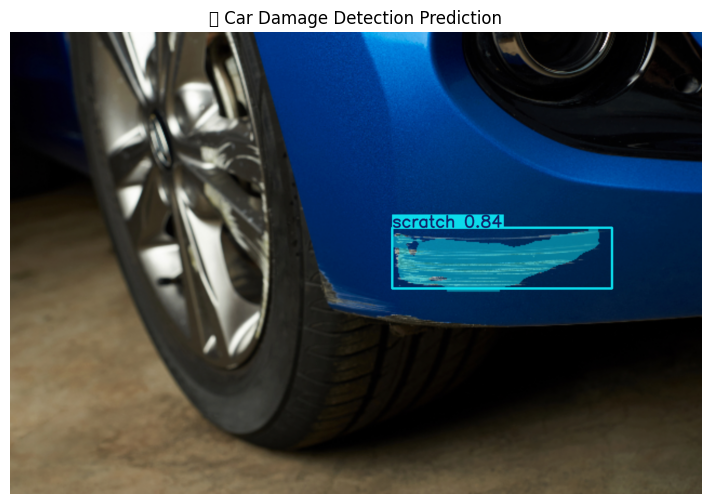

✅ Prediction saved to: /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test/model_test_on_out_images/downloaded_image_20250216_162318_predicted.jpeg
🎯 Predicted image saved at: /content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test/model_test_on_out_images/downloaded_image_20250216_162318_predicted.jpeg


In [31]:
# Define paths
image_path = "/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test/model_test_on_out_images/downloaded_image_20250216_162318.jpeg"
model_path = "/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/weights/best.pt"
output_folder = "/content/drive/MyDrive/CARS DATA/Abdulrahman/car damage dataset train/car_damage_segmentation/model_test/model_test_on_out_images"

# Run prediction
predicted_image = predict_and_save(image_path, model_path, output_folder)

if predicted_image:
    print(f"🎯 Predicted image saved at: {predicted_image}")
else:
    print("❌ Prediction failed.")
